<a href="https://colab.research.google.com/github/kimayeon-hub/DeepLearning1/blob/main/Week6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 데이터를 딥러닝을 사용해서 학습시키기
- MNIST 데이터
  - 손 글씨 숫자 데이터
  - 손 글씨를 어떻게 하면 잘 인식할 수 있을까를 잘 평가하기 위해서 만든 데이터
- 오늘의 학습 목표
  - 딥러닝을 사용해서 MNIST 데이터를 학습시키는 튜토리얼 배우기
  - 나온 결과를 분석하면서, 어떤 부분에서 좋고, 안 좋은지 평가하는 방법 배우기

## MNIST 데이터셋 가져오기
- colab에서 MNIST 데이터셋을 기본으로 제공하고 있음
- `sample_data` > `mnist_train_small.csv`, `mnist_test.csv`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_train = pd.read_csv('./sample_data/mnist_train_small.csv', header=None) # 해당 파일은 column값이 없음. header=None 옵션을 쓰지 않으면 이상한 값이 column명이 됨
data_test = pd.read_csv('./sample_data/mnist_test.csv', header=None)

In [ ]:
data_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 데이터 전처리
> 1. 데이터프레임을 numpy 형태로 바꾸기
> 2. 출력 데이터(train_y, test_y)과 입력 데이터(train_x, test_x) 구분
> 3. 입력 데이터를 3차원으로 바꾸기
> 4. 출력 데이터를 categorical로 인식하도록 one-hot encoding하기


- 785 개의 column의 의미
  - 이미지는 2차원인데
  - 데이터를 쉽게 나타내기 위해서 1차원으로 쭉 늘어 놓은 것
- 왜 3차원으로 변환하느냐?
  - 이미지 형태로 딥러닝 학습에 사용하기 위해서는 convolution을 해야 함
  - 2차원 convolution layer에 이미지를 집어 넣을 때,
  - 뒤쪽에 차원이 하나 더 필요하도록 만들어져 있기 때문.



In [ ]:
train_y = np.array(data_train)[:, 0]
train_x = np.array(data_train)[:, 1:]
test_y = np.array(data_test)[:, 0]
test_x = np.array(data_test)[:, 1:]

In [ ]:
train_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
train_x.shape

(20000, 784)

In [ ]:
# 2차원으로 변환
train_x = np.reshape(train_x, (-1, 28, 28))

In [ ]:
train_x.shape

(20000, 28, 28)

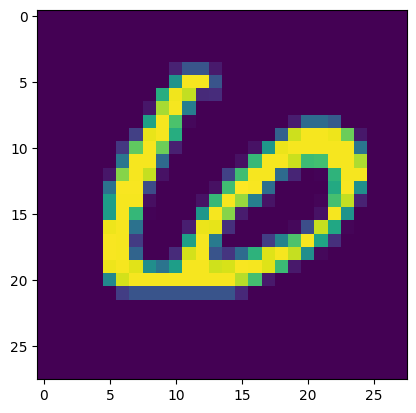

In [ ]:
# 첫번째 값을 찍어보기 -> matplotlib 사용
plt.imshow(train_x[0, :, :])

In [ ]:
# 3차원으로 변환
train_x = np.reshape(train_x, (-1, 28, 28, 1))
test_x = np.reshape(test_x, (-1, 28, 28, 1))

In [ ]:
train_x.shape

(20000, 28, 28, 1)

In [ ]:
# train_y를 범주형 데이터로 쓰기 위해 one-hot encoding하기
import keras
train_y = keras.utils.to_categorical(train_y)

In [ ]:
train_y.shape

(20000, 10)

In [ ]:
test_y.shape

(10000, 10)

## 딥러닝 모델 만들기
- layer
  - `Con2D`
    - convolution(합성곱)을 하는 층
    - filters: 필터 개수 (일반적으로 8, 16, 32 ...)
    - kernel_size: 커널의 크기
  - `MaxPooling2D`
    - 크기를 절반으로 줄이는 층
  - `Dense`
    - 마지막 층으로 완전연결층을 사용해야 함
    - activation='soffmax'
      - 10가지 중에 하나를 골라야 되는데 10개의 출력들의 합이 1이 되도록 하는 것

- compile
  - loss
    - 분류모델이기 때문에 categorical_crossentropy를 사용해야 함
  - optimizers
    - RMSprop을 사용해도 되고, Adam을 사용해도 됨


In [ ]:
from keras.models import Sequential
from keras import layers
from keras import optimizers

In [ ]:
model = Sequential()
model.add(layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 모델 구조 보기
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,298 (94.91 KB)

 Trainable params: 24,298 (94.91 KB)

 Non-trainable params: 0 (0.00 B)

## 모델 학습시키기

In [ ]:
model.fit(train_x, train_y, epochs=10, batch_size=64, validation_split=0.3)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.3807 - loss: 13.4955 - val_accuracy: 0.7942 - val_loss: 1.8256
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.8115 - loss: 1.6656 - val_accuracy: 0.8550 - val_loss: 1.0974
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.8721 - loss: 0.9260 - val_accuracy: 0.8850 - val_loss: 0.7792
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.8953 - loss: 0.6323 - val_accuracy: 0.9003 - val_loss: 0.6157
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9156 - loss: 0.4688 - val_accuracy: 0.9123 - val_loss: 0.4971
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9303 - loss: 0.3540 - val_accuracy: 0.9197 - val_loss: 0.4480
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9416 - loss: 0.2719 - val_accuracy: 0.9298 - val_loss: 0.3801
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9483 - loss: 0.2396 - val_a

## 모델 분석
- accuracy를 보면 0.3부터 0.96까지 빠르게 학습이 된 것을 알 수 있음
- validataion accuracy가 계속 증가하고 있는 것으로 보아, overfitting은 되지 않았다는 것을 알 수 있음

## 모델 테스트
- `np.argmax`를 사용해서 예측값을 이해하기 쉽게 숫자로 변환하기

In [ ]:
o = model.predict(test_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


## 모델 평가

#### 정확도 확인하기

In [ ]:
# 결과 하나 살펴보기 (가장 큰 값이 정답으로 예측한 값이 됨)
o[0, :] # 7로 예측한 것

array([1.2549442e-18, 7.8571243e-22, 3.0518191e-15, 4.5538249e-09,
       4.2794859e-18, 2.8917249e-19, 7.3459241e-20, 9.9999994e-01,
       8.8852055e-14, 1.2423766e-14], dtype=float32)

In [ ]:
# 7이 맞는지 확인하기
test_y[0] # 7이 맞음

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [ ]:
# 예측값을 숫자형으로 바꾸기
o = np.argmax(o, -1)
o

array([7, 2, 1, ..., 4, 8, 6])

In [ ]:
np.sum(test_y == o) / o.shape[0]

np.float64(0.9432)

#### confusion matrix
- 무엇을 무엇으로 예측하였는가
- confusion matrix를 사용하는 이유
  - 정확도만 보면 어디서 틀린 예측을 했는지를 모름
  - 어디서 오류가 났는지 알아내서, 학습 데이터를 바꾸던가 오류난 부분과 관련된 부분을 고칠 수 있음
- Accuracy: 전체 test 데이터 중에 얼마나 맞췄는가 (TN/N)

In [ ]:
cm = np.zeros((10, 10))
for i in range(o.shape[0]):
  y = test_y[i] # 정답 값
  d = o[i] # 예측 값
  cm[y, d] += 1

In [ ]:
cm = cm.astype('int32')

In [ ]:
cm

array([[ 952,    0,    1,    2,    1,    8,    7,    1,    7,    1],
       [   1, 1114,    3,    8,    0,    0,    0,    1,    8,    0],
       [  10,   13,  933,   24,    9,    2,    5,   14,   16,    6],
       [   1,    1,    9,  961,    0,   10,    3,   14,    6,    5],
       [   4,    0,    4,    0,  931,    0,    4,    9,    5,   25],
       [   4,    0,    0,   15,    0,  839,   15,    3,   11,    5],
       [  11,    2,    2,    2,    2,    8,  922,    1,    7,    1],
       [   2,    6,   12,    9,    5,    1,    0,  950,    6,   37],
       [   8,    2,    5,   31,    1,   13,   17,    6,  883,    8],
       [   6,    3,    6,    8,    6,    4,    0,   18,   11,  947]],
      dtype=int32)

> 0을 0으로 예측한 것이 952개다. <br>
> 0을 2로 예측한 것이 1개다. <br>
> ... <br>
> 8을 3으로 예측한 것이 31개이다.

#### 예측 실패한 데이터만 보기

In [ ]:
condition = o != test_y
condition

array([False, False, False, ..., False,  True, False])

In [ ]:
wrong_x = test_x[condition,:,:,:]
wrong_y = test_y[condition]
wrong_o = o[condition]

In [ ]:
wrong_y.shape

(568,)

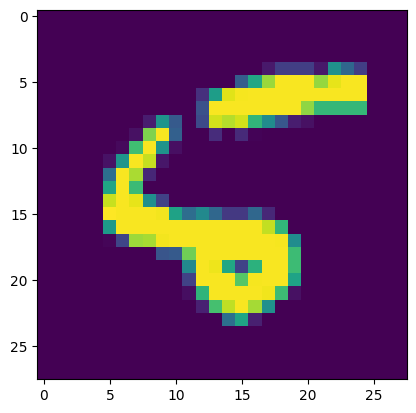

In [ ]:
# 예측 실패한 이미지 보기
plt.imshow(wrong_x[0,:,:,0])

In [ ]:
# 위 그림의 정답 값
wrong_y[0]

np.int64(5)

In [ ]:
# 5를 뭐로 잘못 인식했느냐
wrong_o[0]

np.int64(6)

#### Train Accuracy, validation accuracy, train loss, validataion loss

#### precision, recall, F1 score